In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions.word2vec import listcomparision, model_comparison
% matplotlib inline

# Import O*NET Data

In [2]:
googledata = pickle.load(open('googledata.p', 'rb'))
onetdata = pickle.load(open('onetdata.p', 'rb'))

# Create a list of all the O*NET SOC Codes

In [3]:
soc = googledata['onetsoc_code'].values

# Generate cosine similarity for each O*NET SOC Code

In [4]:
similarity = [model_comparison(googledata, onetdata, s) for s in soc]

# Look at model performance as related to number of jobs

In [9]:
performance = []

for idx, s in enumerate(soc): 
    counts = [3, 5, 10, 15, 20, 25]
    gd = similarity[idx]['data1']
    od = similarity[idx]['data2']
    
    top = [{'soc':s, 'count':c, 'method':'top', 'overlap':listcomparision(gd.head(c)['title'].values, 
                                                                          od.head(c)['title'].values)} 
           for c in counts]
    bottom = [{'soc':s, 'count':c, 'method':'bottom', 'overlap':listcomparision(gd.tail(c)['title'].values, 
                                                                                od.tail(c)['title'].values)} 
              for c in counts]
    overall = [{'soc':s, 'count':c, 'method':'overall', 'overlap':listcomparision(np.append(gd.head(c)['title'].values , gd.tail(c)['title'].values), 
                                                                                  np.append(od.head(c)['title'].values , od.tail(c)['title'].values))
               } for c in counts]
    
    performance += top 
    performance += bottom 
    performance += overall
    
# Create a DF out of the results    
perfdf = pd.DataFrame(performance)

# Calculate the mean overlap between the two models

In [10]:
# Mean overlap
averages = []

for x in [3, 5, 10, 15, 20, 25]: 
    top = perfdf[(perfdf['count'] == x) & (perfdf['method'] == 'top') ]['overlap'].mean()
    bottom = perfdf[(perfdf['count'] == x) & (perfdf['method'] == 'bottom') ]['overlap'].mean()
    overall = perfdf[(perfdf['count'] == x) & (perfdf['method'] == 'overall') ]['overlap'].mean()
    averages.append({'n':x, 'bottom':bottom, 'top':top, 'overall': overall})

# Create a DF
averagesdf = pd.DataFrame(averages)[['n', 'top', 'bottom', 'overall']]

# Plot the model overlap

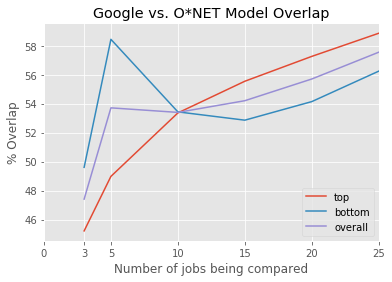

In [11]:
plt.style.use('ggplot')
averagesdf.set_index('n').plot(xticks=[0, 3, 5, 10, 15, 20, 25]);
plt.title("Google vs. O*NET Model Overlap")
plt.xlabel("Number of jobs being compared")
plt.ylabel("% Overlap")
